______

# **Evaluation and Validation**
#### **Evaluation Techniques**

- **Accuracy**
  - **Definition**: Accuracy measures the proportion of correctly predicted instances among the total instances. It is defined as:
    $$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$
  - **Use Case**: Accuracy is straightforward and works well when the classes are balanced. For example, if a model classifies 90 out of 100 instances correctly, its accuracy is 90%.
  - ![Evaluation & Validation](<./Images/Evaluation and Validation (1).png>)

- **Precision and Recall**
  - **Precision**
    - **Definition**: Precision measures the proportion of true positive predictions among all positive predictions. It is defined as:
      $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$
    - **Use Case**: Precision is critical when the cost of false positives is high. For instance, in spam detection, high precision means fewer legitimate emails are incorrectly classified as spam.
  - **Recall**
    - **Definition**: Recall measures the proportion of true positive predictions among all actual positives. It is defined as:
      $$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$
    - **Use Case**: Recall is important when the cost of false negatives is high. For example, in medical diagnosis, high recall make sures most positive cases are identified.

- **F1-Score**
  - **Definition**: The F1-Score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall. It is defined as:
    $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$
  - **Use Case**: The F1-Score is useful when dealing with imbalanced datasets. It provides a single metric that accounts for both false positives and false negatives, making it a better measure than accuracy in some cases.

- **Numerical Example**
  - ![Evaluation & Validation](<./Images/Evaluation and Validation (4).png>)
  - **Accuracy Example**: If a model correctly predicts 90 out of 100 instances, its accuracy is 90%.
  - **F1-Score Example**: If precision is 0.8 and recall is 0.6, the F1-Score would be:
    $$ \text{F1-Score} = 2 \times \frac{0.8 \times 0.6}{0.8 + 0.6} \approx 0.685 $$
    An F1-Score greater than 1 is not possible since it is a harmonic mean and is bounded between 0 and 1.
---

#### **Validation Techniques**
- **Linear Regression and Beta Values**
    - **Linear Regression** is a statistical method to model the relationship between a dependent variable (Y) and one or more independent variables (X).
    - The **Beta Values (Coefficients)** represent the weight of each independent variable in predicting the dependent variable.
    - The model equation is $$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n $$, where $$\beta_0$$ is the intercept, and $$\beta_1, \beta_2, ..., \beta_n$$ are the coefficients.
    - **Use Case**: Useful for understanding the relationship between variables and for making predictions.

- **Regularization and Lambda Value**
  - **Regularization**
    - **Definition** Regularization adds a penalty to the model’s complexity to prevent overfitting. It helps improve the model's generalization by constraining the coefficients.
    - **Common Techniques**
      - **Ridge Regression (L2 Regularization)** Adds a penalty proportional to the square of the magnitude of coefficients.
        $$ \text{Ridge Loss} = \text{OLS Loss} + \lambda \sum_{j=1}^{n} \beta_j^2 $$
      - **Lasso Regression (L1 Regularization)** Adds a penalty proportional to the absolute value of the coefficients.
        $$ \text{Lasso Loss} = \text{OLS Loss} + \lambda \sum_{j=1}^{n} |\beta_j| $$
    - **Lambda (λ) Value** Controls the strength of the penalty. Higher values of λ increase the penalty, leading to simpler models with smaller coefficients.

- **Hold-Out Method**
    - ![Evaluation & Validation](<./Images/Evaluation and Validation (5).png>)
  - **Definition** The dataset is split into two subsets: training and testing sets. The model is trained on the training set and evaluated on the testing set.
  - **Use Case** Simple and quick but can be prone to high variance depending on how the data is split.

- **K-Fold Cross Validation**
    - ![Evaluation & Validation](<./Images/Evaluation and Validation (6).png>)
  - **Definition** The dataset is divided into k subsets (folds). The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times with each fold used exactly once as a test set.
  - **Use Case** Provides a more reliable estimate of the model’s performance and reduces variance compared to the hold-out method. Common values for k are 5 or 10.

- **Random Subsampling**
    - ![Evaluation & Validation](<./Images/Evaluation and Validation (7).png>)
        - The randomly selected samples become the test set while the rest becomes the training. 
        - When we randomly select with replacement for the training set, it is called Bootstrapping.
  - **Definition** Randomly selects a subset of the data for training and testing multiple times. Each time, different subsets are used for training and testing.
  - **Use Case** Useful for models where data is too large to fit into memory or when you want to test the model on various random samples.

**Summary** Evaluation and validation techniques are essential for assessing model performance and making sure its generalizability. Methods like accuracy, precision, recall, and F1-Score provide insights into different aspects of model performance. Validation techniques like hold-out, k-fold cross-validation, and random subsampling help in estimating model performance and mitigating overfitting. Regularization methods like Ridge and Lasso regression are crucial for preventing overfitting by controlling model complexity.

---


### **Project- Model Evaluation Dashboard**
- **Objective** Create a dashboard to evaluate and compare multiple machine learning models using metrics like Accuracy, Precision, Recall, and F1-Score.
- **Description** We'll use the Iris dataset, a default dataset in scikit-learn, to demonstrate model evaluation.
#### **Implementation**
##### **Import necessary libraries**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

##### **Load and prepare the dataset**

In [2]:
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### **Initialize classifiers**

In [3]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

##### **Evaluate models**

In [4]:
metrics = {name: {} for name in models}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics[name]['Accuracy'] = accuracy_score(y_test, y_pred)
    metrics[name]['Precision'] = precision_score(y_test, y_pred, average='weighted')
    metrics[name]['Recall'] = recall_score(y_test, y_pred, average='weighted')
    metrics[name]['F1 Score'] = f1_score(y_test, y_pred, average='weighted')

##### **Plot the metrics**

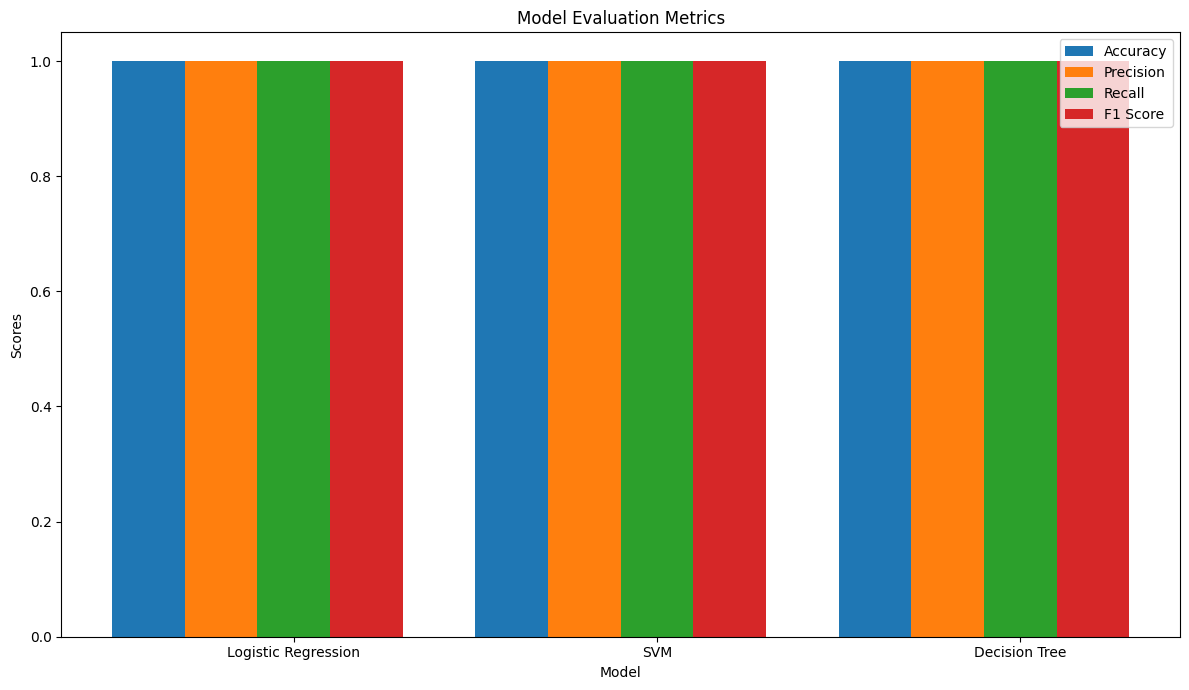

In [5]:
labels = list(metrics.keys())
accuracy = [metrics[label]['Accuracy'] for label in labels]
precision = [metrics[label]['Precision'] for label in labels]
recall = [metrics[label]['Recall'] for label in labels]
f1_score_values = [metrics[label]['F1 Score'] for label in labels]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, precision, width, label='Precision')
rects3 = ax.bar(x + width, recall, width, label='Recall')
rects4 = ax.bar(x + 2*width, f1_score_values, width, label='F1 Score')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


#### **Plot decision boundaries**

In [6]:
def plot_decision_boundaries(X, y, model, ax, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=cmap_bold)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')



#### **Create subplots**

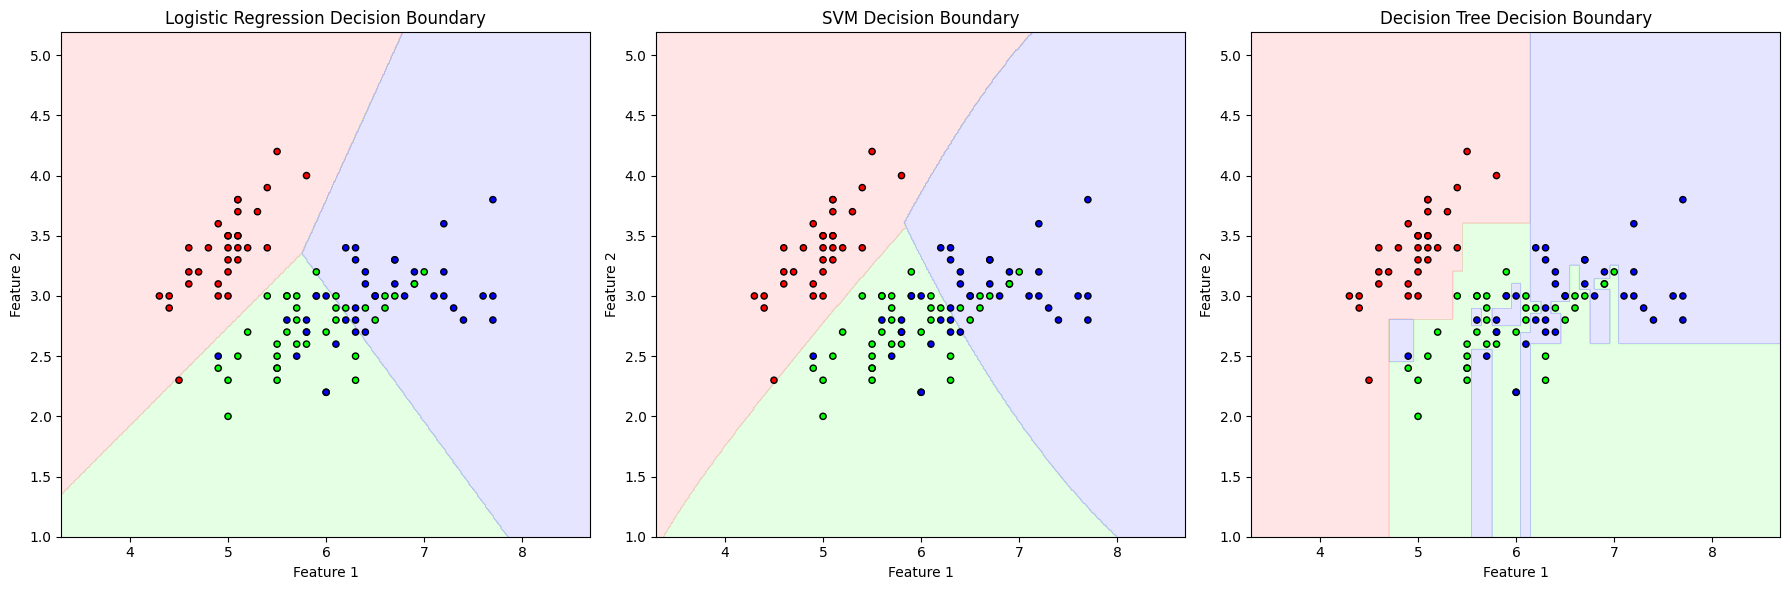

In [7]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train[:, :2], y_train)
    plot_decision_boundaries(X_train[:, :2], y_train, model, ax, f'{name} Decision Boundary')

plt.tight_layout()
plt.show()
